## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [2]:
import pandas as pd

file_path = 'github_bot_processed_data.csv'
data = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [3]:
print(pd.options.display)

2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。

In [4]:
print("数据集的前几行：")
print(data.head())

数据集的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6

In [5]:
print("\n数据集的基本信息：")
print(data.info())


数据集的基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None


二者区别：

- head()显示数据集前几行，默认5行

- info()会显示数据集的基本结构和每列的统计信息

In [6]:
print("\n数据描述性统计信息：")
print(data.describe())


数据描述性统计信息：
       public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000


3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [7]:
#日期格式化
data['created_at'] = pd.to_datetime(data['created_at']).dt.strftime('%Y-%m-%d')
data['updated_at'] = pd.to_datetime(data['updated_at']).dt.strftime('%Y-%m-%d')

#数值列百分数处理
data['followers'] = data['followers'].apply(lambda x: f"{x:,}")
data['following'] = data['following'].apply(lambda x: f"{x:,}")
data['public_repos'] = data['public_repos'].apply(lambda x: f"{x:,}")

data['engagement_rate'] = (
    data['followers'].str.replace(",", "").astype(float) / 
    data['following'].str.replace(",", "").astype(float)
).replace([float('inf'), -float('inf')], 0)  # 处理除零错误
data['engagement_rate'] = data['engagement_rate'].fillna(0).apply(lambda x: f"{x:.2%}")

print(data.head())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio public_repos  \
0                                                NaN           26   
1  I just press the buttons randomly, and the pro...           30   
2         Time is unimportant,\nonly life important.          103   
3                                                NaN           49   
4                                                NaN           11   

   public_gists followers following  created_at  updated_at  text_bot_count  \
0             1         5         1  2011-09-26  2023-10-13               0   
1             3         9     

4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [8]:
import numpy as np


log_transformed_data = data.copy()

# 将需要变换的列转换为数值类型（去掉格式化后的逗号）
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    # 如果列已是数字类型则跳过转换
    if log_transformed_data[col].dtype == 'object':
        log_transformed_data[col] = log_transformed_data[col].str.replace(",", "").astype(float)


for col in columns_to_transform:
    log_transformed_data[f'log_{col}'] = np.log1p(log_transformed_data[col])

transformed_columns = [f'log_{col}' for col in columns_to_transform]
log_transformed_subset = log_transformed_data[transformed_columns]


from IPython.display import display

# 在 Notebook 中友好展示
display(log_transformed_subset.head())

log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612

5. 使用Matplotlib绘制图表
- 绘制条形图：展示label列的类别分布。

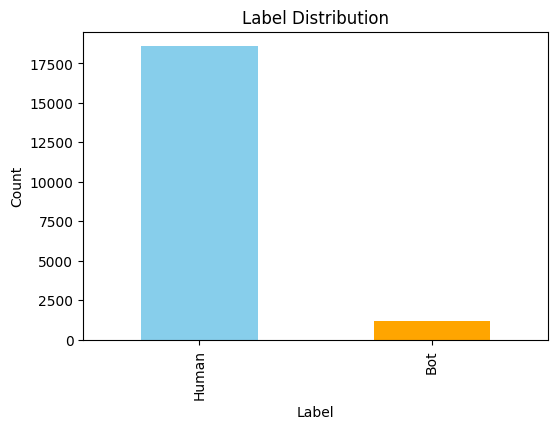

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
log_transformed_data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

- 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。

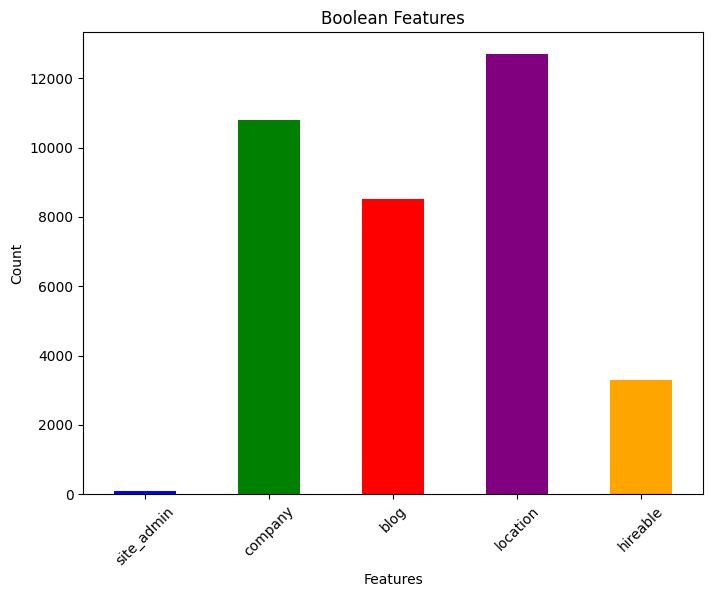

In [10]:
bool_columns = ['site_admin', 'company', 'blog', 'location', 'hireable']
stacked_data = log_transformed_data[bool_columns].astype(int)

stacked_data.sum().plot(kind='bar', stacked=True, figsize=(8, 6), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Boolean Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- 绘制直方图：展示log_public_repos的对数变换后的数据分布。

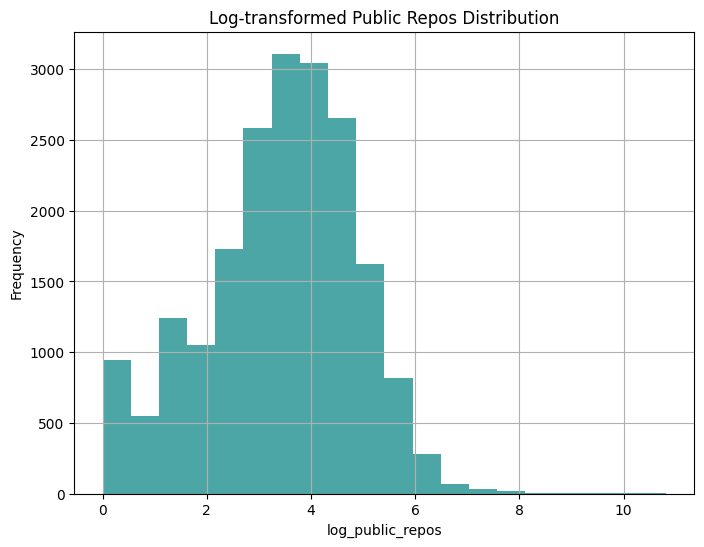

In [11]:
import numpy as np


# 如果没有 log_public_repos 列，确保以下代码已执行：
log_transformed_data['log_public_repos'] = np.log1p(log_transformed_data['public_repos'])

plt.figure(figsize=(8, 6))
plt.hist(log_transformed_data['log_public_repos'], bins=20, color='teal', alpha=0.7)
plt.title('Log-transformed Public Repos Distribution')
plt.xlabel('log_public_repos')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 绘制散点图：展示 public_repos 与 followers 之间的关系

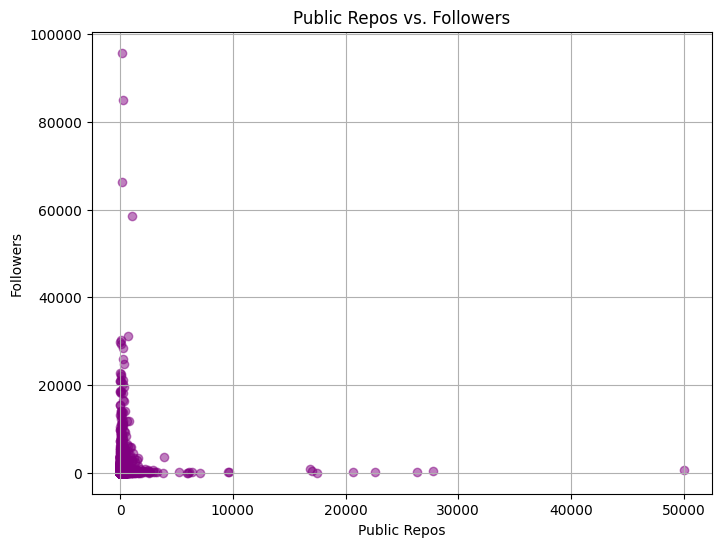

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(
    log_transformed_data['public_repos'], 
    log_transformed_data['followers'], 
    alpha=0.5, c='purple'
)
plt.title('Public Repos vs. Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

- 绘制散点矩阵：展示多个数值型特征之间的成对关系

<Figure size 1000x800 with 0 Axes>

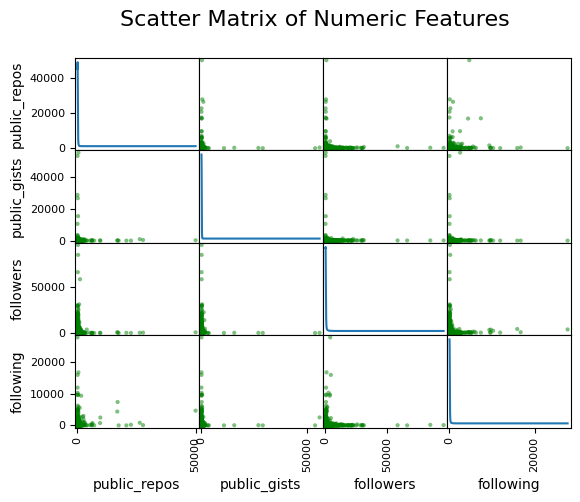

In [13]:
from pandas.plotting import scatter_matrix

numeric_cols = ['public_repos', 'public_gists', 'followers', 'following']
for col in numeric_cols:
    log_transformed_data[col] = log_transformed_data[col].replace(",", "", regex=True).astype(float)
    
for col in numeric_cols:
    log_transformed_data[f'log_{col}'] = np.log1p(log_transformed_data[col])

plt.figure(figsize=(10, 8))
scatter_matrix(log_transformed_data[numeric_cols], alpha=0.5, diagonal='kde', color='green')
plt.suptitle('Scatter Matrix of Numeric Features', fontsize=16)
plt.show()

6.使用Seaborn绘制图表
- 绘制箱线图：展示不同label类别下log_followers的分布。
    

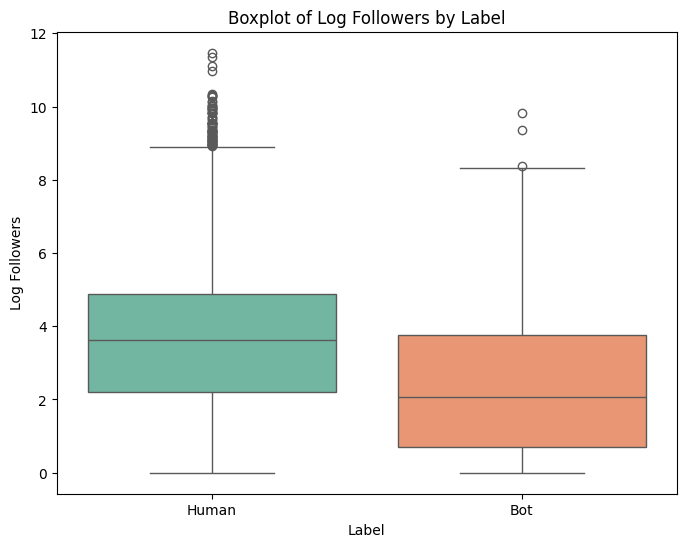

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='label', 
    y='log_followers', 
    data=log_transformed_data, 
    hue='label',  # 设置 hue 为 'label' 符合 Seaborn 的要求
    palette='Set2',
    dodge=False  # 关闭分组效果以保持单一颜色
)
plt.title('Boxplot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

- 绘制成对图：展示不同特征之间的成对关系，并根据label分类。

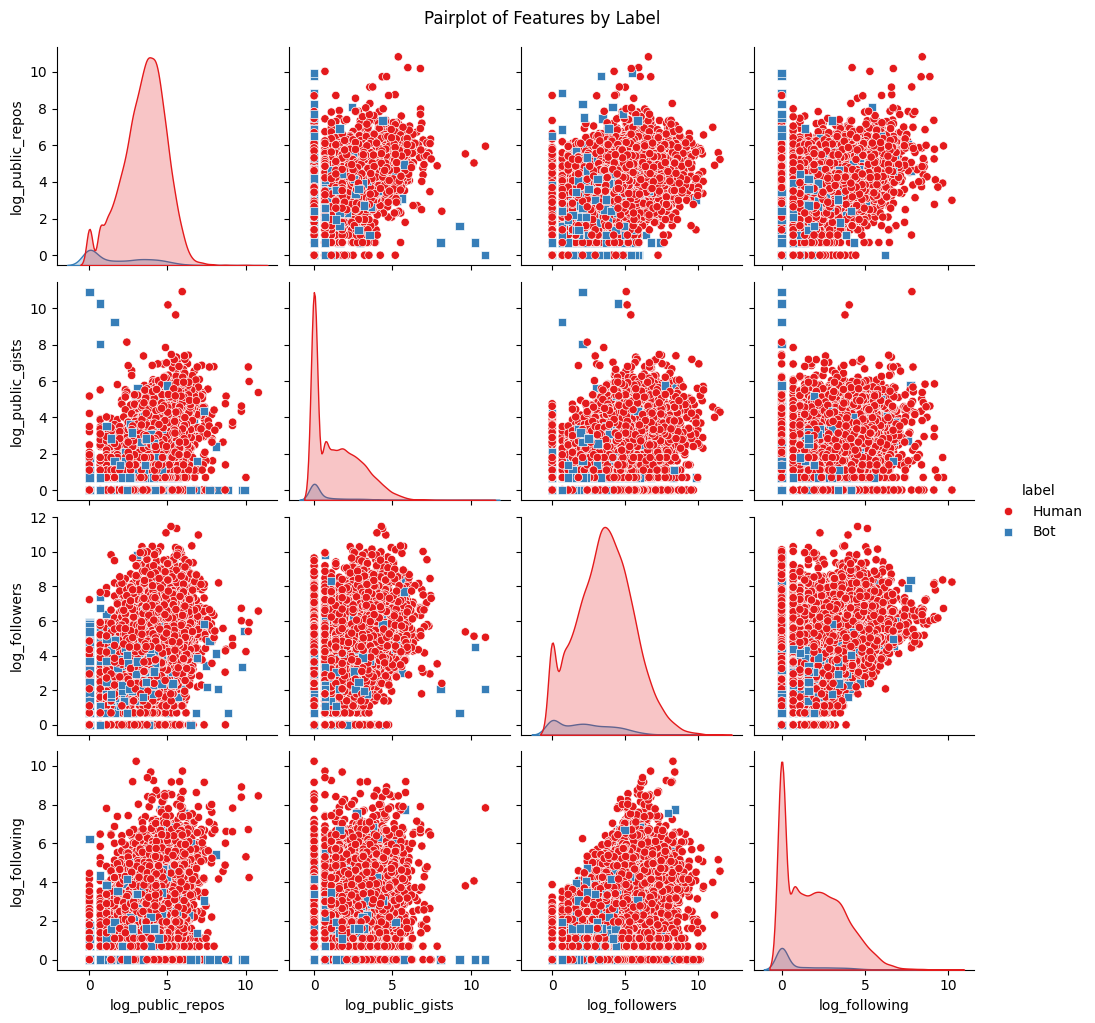

In [15]:
pair_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(
    log_transformed_data[pair_features + ['label']], 
    hue='label', 
    palette='Set1', 
    diag_kind='kde', 
    markers=["o", "s"]
)
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

- 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。

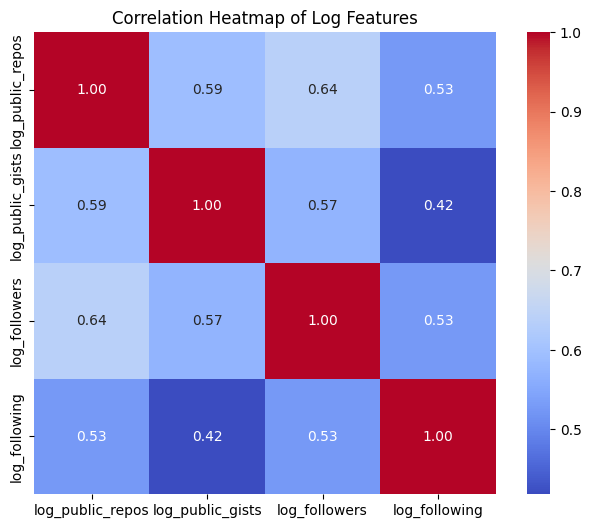

In [16]:
correlation_matrix = log_transformed_data[pair_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Log Features')
plt.show()

- 绘制小提琴图：展示label与log_followers之间的分布差异。

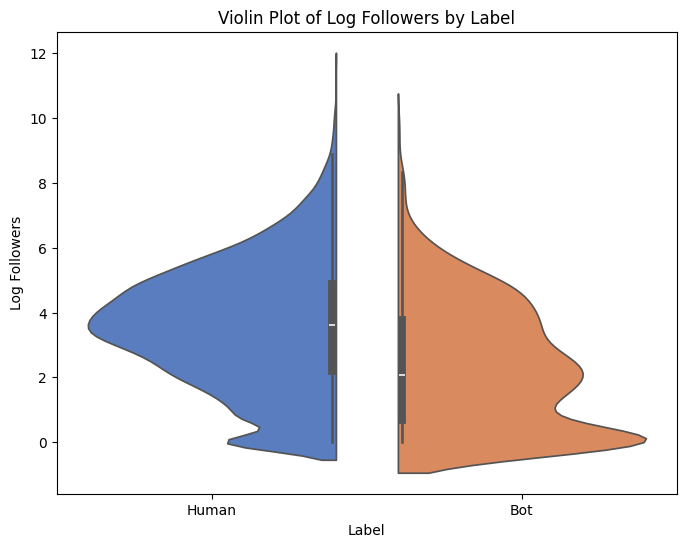

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='label',
    y='log_followers',
    data=log_transformed_data,
    hue='label',  # 添加分类信息
    palette='muted', 
    split=True,  # 保留分割效果
    dodge=False  # 避免分组效果
)
plt.title('Violin Plot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [18]:
import ydata_profiling
#没办法正常使用pandas_profiling，网上找到的解决方法是换成ydata_profiling
# 生成交互式数据分析报告
profile = ydata_profiling.ProfileReport(data, title="Interactive Data Analysis Report", explorative=True)
profile



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]